### Name: Chinedu Onyeka
#### DATA1200 Assignment 2 : Multiple Linear Regression
##### Date: November 3rd, 2021

In [27]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# read the dataset
url = "https://raw.githubusercontent.com/chinedu2301/DC_Analytics/main/Absenteeism.csv"
absenteeism = pd.read_csv(url)

# check the head
absenteeism.head(n = 10)

,ID,Social drinker,Social smoker,Pet,Weight,Height,BMI,Absenteeism
0,11,1,0,1,90,172,30,4
1,36,1,0,0,98,178,31,0
2,3,1,0,0,89,170,31,2
3,7,1,1,0,68,168,24,4
4,11,1,0,1,90,172,30,2
5,3,1,0,0,89,170,31,2
6,10,1,0,4,80,172,27,8
7,20,1,0,0,65,168,23,4
8,14,1,0,0,95,196,25,40
9,1,0,0,1,88,172,29,8


In [4]:
# check the info
absenteeism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              740 non-null    int64
 1   Social drinker  740 non-null    int64
 2   Social smoker   740 non-null    int64
 3   Pet             740 non-null    int64
 4   Weight          740 non-null    int64
 5   Height          740 non-null    int64
 6   BMI             740 non-null    int64
 7   Absenteeism     740 non-null    int64
dtypes: int64(8)
memory usage: 46.4 KB


In [6]:
# check key statistics
absenteeism.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.0,9.0,18.0,28.0,36.0
Social drinker,740.0,0.567568,0.495749,0.0,0.0,1.0,1.0,1.0
Social smoker,740.0,0.072973,0.260268,0.0,0.0,0.0,0.0,1.0
Pet,740.0,0.745946,1.318258,0.0,0.0,0.0,1.0,8.0
Weight,740.0,79.035135,12.883211,56.0,69.0,83.0,89.0,108.0
Height,740.0,172.114865,6.034995,163.0,169.0,170.0,172.0,196.0
BMI,740.0,26.677027,4.285452,19.0,24.0,25.0,31.0,38.0
Absenteeism,740.0,6.924324,13.330998,0.0,2.0,3.0,8.0,120.0


In [7]:
# check for null values
absenteeism.isnull().sum()

ID                0
Social drinker    0
Social smoker     0
Pet               0
Weight            0
Height            0
BMI               0
Absenteeism       0
dtype: int64

<h3> Exploratory data analysis </h3>

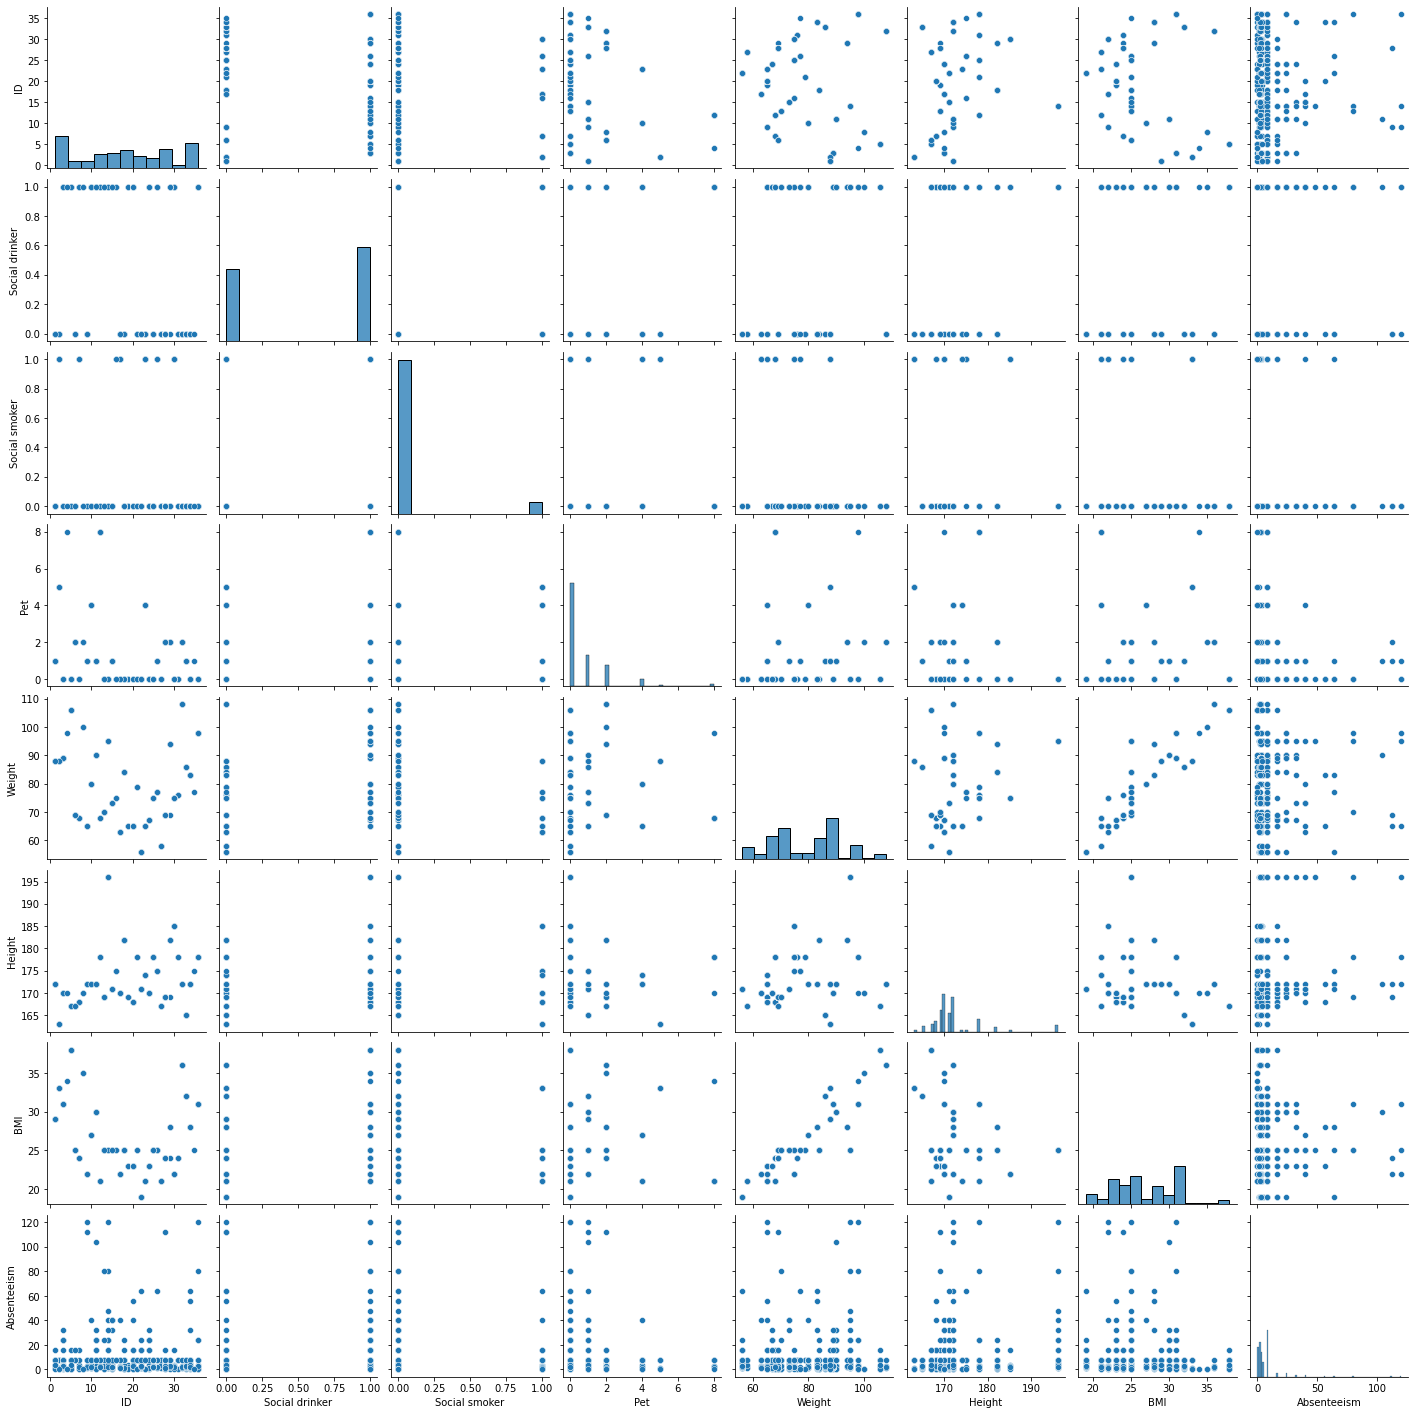

In [8]:
# pairplot
sns.pairplot(absenteeism)

<AxesSubplot:>

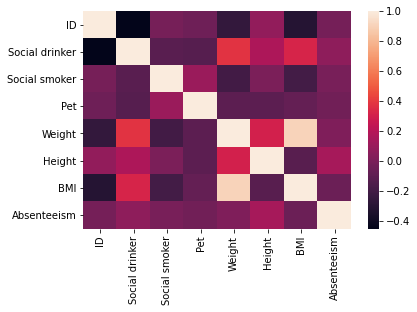

In [9]:
# heatmap
sns.heatmap(absenteeism.corr())

Text(0.5, 1.0, 'BMI vs Weight')

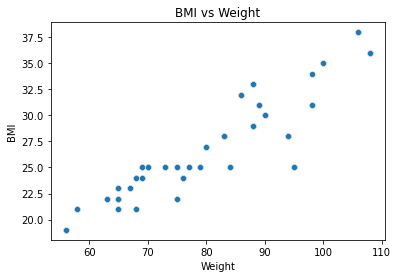

In [13]:
# scatterplot
sns.scatterplot(data = absenteeism, x = 'Weight', y = 'BMI')
plt.title("BMI vs Weight")

<AxesSubplot:xlabel='BMI', ylabel='Absenteeism'>

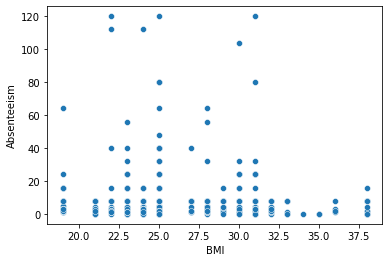

In [16]:
sns.scatterplot(data = absenteeism, x = "BMI", y = "Absenteeism")

<AxesSubplot:>

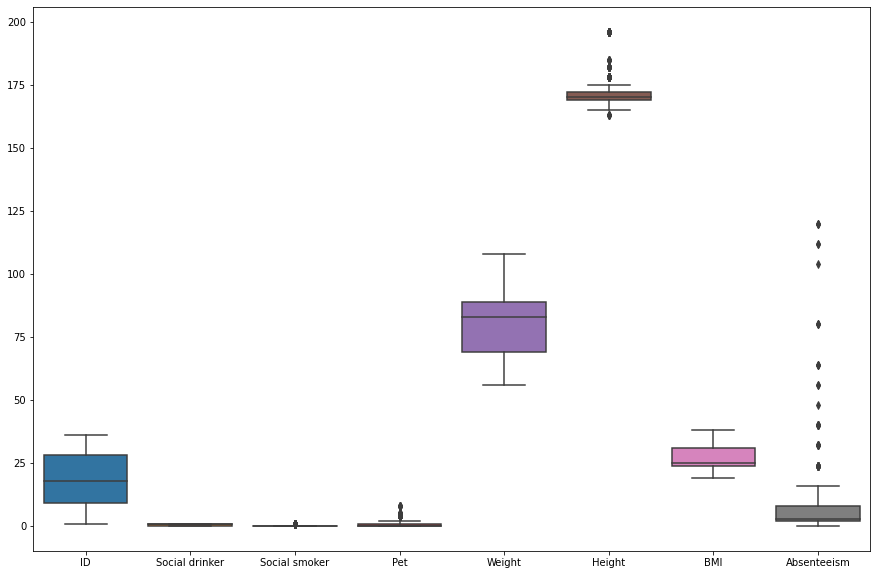

In [17]:
# boxplot
plt.figure(figsize = (15,10))
sns.boxplot(data = absenteeism)

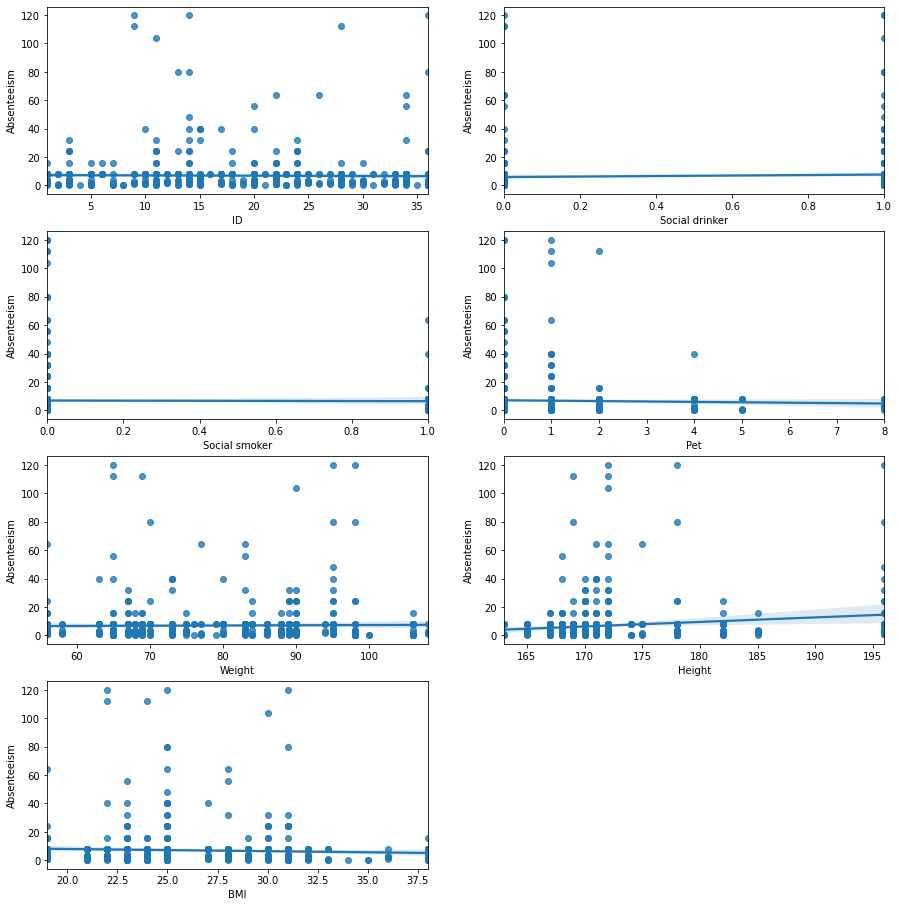

In [18]:
# scatterplots
plt.figure(figsize = (15,20))

cnt = 1
for col in absenteeism.columns:
    if (col == 'Absenteeism'):
        continue
        
    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x = absenteeism[col], y = absenteeism.Absenteeism)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel("Absenteeism")
    cnt +=1

<h3> Training and Testing Data </h3>

In [20]:
y = absenteeism['Absenteeism']
features = ['ID', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'BMI'] 
X = absenteeism[features]

# Split the dataset into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


#### Create the model

In [37]:
# Scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train2 = sc.fit_transform(X_train)
# X_test2 = sc.transform(X_test)

In [43]:
# create the model

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### Predict

Text(0.5, 0, 'y test values')

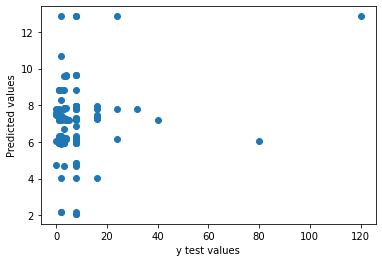

In [44]:
predictions = lm.predict(X_test)

# plot a scatterplot of the predicted y values vs the y test values
plt.scatter(y_test, predictions)
plt.ylabel("Predicted values")
plt.xlabel("y test values")

#### Evaluate the model

In [45]:
# Print the intercept
print(lm.intercept_)

81.49250625085656


In [51]:
# Calculate metrics
print("MAE: ", round(metrics.mean_absolute_error(y_test, predictions),0))
print("MSE: ", round(metrics.mean_squared_error(y_test, predictions),0))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),0))
print("R2: ", round(metrics.r2_score(y_test, predictions), 4))

MAE:  6.0
MSE:  151.0
RMSE:  12.0
R2:  0.0484


In [48]:
# Show the coefficients of all the features
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
ID,-0.014412
Social drinker,1.028594
Social smoker,0.140156
Pet,-0.185760
Weight,0.727054
Height,-0.420893
BMI,-2.241736


#### Residuals

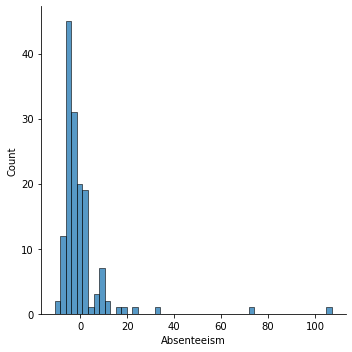

In [49]:
sns.displot((y_test-predictions), bins=50)